In [1]:
%matplotlib inline

In [2]:
from empirical_disk_bulge.observations import load_umachine_sdss_complete

sdss = load_umachine_sdss_complete()
mask = sdss['type_mendel13'] != 4
mask *= sdss['deltaBD_mendel13'] <= 1
mask *= ~np.isnan(sdss['bulge_to_total_rband_meert15'])
cut_sdss = sdss[mask]


In [3]:
print(cut_sdss.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'ssfr', 'bt_mendel13']


In [4]:
from empirical_disk_bulge.observations import sfr_sequence_bulge_disk_fractions_vs_sm


_result_mendel13 = sfr_sequence_bulge_disk_fractions_vs_sm(cut_sdss['bt_mendel13'], 
                                              cut_sdss['sm'], cut_sdss['ssfr'])
sm_abscissa, frac_disk_dom_all_mendel13, frac_bulge_dom_all_mendel13,\
    frac_disk_dom_sfs_mendel13, frac_bulge_dom_sfs_mendel13, \
    frac_disk_dom_gv_mendel13, frac_bulge_dom_gv_mendel13, \
    frac_disk_dom_q_mendel13, frac_bulge_dom_q_mendel13 = _result_mendel13

In [5]:
_result_meert15 = sfr_sequence_bulge_disk_fractions_vs_sm(cut_sdss['bulge_to_total_rband_meert15'], 
                                              cut_sdss['sm'], cut_sdss['ssfr'])

sm_abscissa, frac_disk_dom_all_meert15, frac_bulge_dom_all_meert15,\
    frac_disk_dom_sfs_meert15, frac_bulge_dom_sfs_meert15, \
    frac_disk_dom_gv_meert15, frac_bulge_dom_gv_meert15, \
    frac_disk_dom_q_meert15, frac_bulge_dom_q_meert15 = _result_meert15

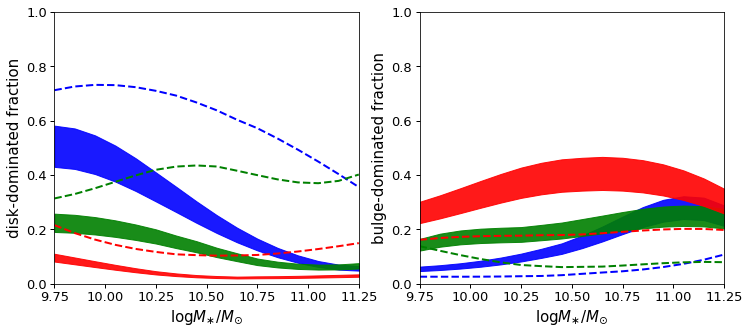

In [19]:
from scipy.signal import savgol_filter

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

a, b = 11, 3

fracerr = 0.15
# ylow, yhigh = ((1-fracerr)*savgol_filter(frac_disk_dom_all_mendel13, a, b), 
#                (1+fracerr)*savgol_filter(frac_disk_dom_all_mendel13, a, b))
# __=ax1.fill_between(sm_abscissa, ylow, yhigh, color='gray', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_disk_dom_sfs_mendel13, a, b), 
               (1+fracerr)*savgol_filter(frac_disk_dom_sfs_mendel13, a, b))
__=ax1.fill_between(sm_abscissa, ylow, yhigh, color='blue', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_disk_dom_gv_mendel13, a, b), 
               (1+fracerr)*savgol_filter(frac_disk_dom_gv_mendel13, a, b))
__=ax1.fill_between(sm_abscissa, ylow, yhigh, color='green', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_disk_dom_q_mendel13, a, b), 
               (1+fracerr)*savgol_filter(frac_disk_dom_q_mendel13, a, b))
__=ax1.fill_between(sm_abscissa, ylow, yhigh, color='red', alpha=0.9)

# ylow, yhigh = ((1-fracerr)*savgol_filter(frac_bulge_dom_all_mendel13, a, b), 
#                (1+fracerr)*savgol_filter(frac_bulge_dom_all_mendel13, a, b))
# __=ax2.fill_between(sm_abscissa, ylow, yhigh, color='gray', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_bulge_dom_sfs_mendel13, a, b), 
               (1+fracerr)*savgol_filter(frac_bulge_dom_sfs_mendel13, a, b))
__=ax2.fill_between(sm_abscissa, ylow, yhigh, color='blue', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_bulge_dom_gv_mendel13, a, b), 
               (1+fracerr)*savgol_filter(frac_bulge_dom_gv_mendel13, a, b))
__=ax2.fill_between(sm_abscissa, ylow, yhigh, color='green', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_bulge_dom_q_mendel13, a, b), 
               (1+fracerr)*savgol_filter(frac_bulge_dom_q_mendel13, a, b))
__=ax2.fill_between(sm_abscissa, ylow, yhigh, color='red', alpha=0.9)

# __=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_sfs_mendel13, a, b), 
#            color='blue', label='star-forming')
# __=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_gv_mendel13, a, b),
#            color='green', label='green valley')
# __=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_all_mendel13, a, b), 
#            color='gray', label='all galaxies')
# __=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_q_mendel13, a, b),
#            color='red', label='quiescent')
# __=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_sfs_mendel13, a, b),
#            color='blue', label='star-forming sequence')
# __=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_gv_mendel13, a, b),
#            color='green', label='green valley')
# __=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_all_mendel13, a, b),
#            color='gray', label='all galaxies')
# __=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_q_mendel13, a, b),
#            color='red', label='quiescent')


# __=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_all_meert15, a, b), 
#             color='k', label='Meert+15')
__=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_sfs_meert15, a, b), 
            '--', color='blue', lw=2)
__=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_gv_meert15, a, b), 
            '--', color='green', lw=2)
__=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_q_meert15, a, b), 
            '--', color='red', lw=2)

# __=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_all_meert15, a, b), 
#             color='k', label='Meert+15')
__=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_sfs_meert15, a, b), 
            '--', color='blue', lw=2)
__=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_gv_meert15, a, b), 
            '--', color='green', lw=2)
__=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_q_meert15, a, b), 
            '--', color='red', lw=2)

xlabel1 = ax1.set_xlabel(r'$\log M_{\ast}/M_{\odot}$', size=15)
xlabel2 = ax2.set_xlabel(r'$\log M_{\ast}/M_{\odot}$', size=15)
ylabel1 = ax1.set_ylabel(r'disk-dominated fraction', size=15)
ylabel2 = ax2.set_ylabel(r'bulge-dominated fraction', size=15)
legend1 = ax1.legend(fontsize=14)

xmin, xmax = 9.75, 11.25
xlim1 = ax1.set_xlim(xmin, xmax)
xlim2 = ax2.set_xlim(xmin, xmax)
ymin, ymax = 0, 1
ylim1 = ax1.set_ylim(ymin, ymax)
ylim2 = ax2.set_ylim(ymin, ymax)

fig.savefig('meert15_vs_mendel13_frac_bulge_disk_vs_sm.pdf', 
            bbox_extra_artists=[xlabel1, ylabel1], bbox_inches='tight')
